In [10]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [11]:
from fastai import *
from fastai.vision import *

In [12]:
bs = 64

In [13]:
path = "/home/harsh/SOP/fastai-model"

In [14]:
path_img = path+'/PILANI_BIRDS'

In [15]:
from pathlib import Path
p = Path(path_img)
dirs = [x for x in p.iterdir() if x.is_dir()]
fnames = [get_image_files(y) for y in dirs]
fnames = [item for sublist in fnames for item in sublist]
fnames[:5]

[PosixPath('/home/harsh/SOP/fastai-model/PILANI_BIRDS/Black Eared Kite/20.black-eared-kite-flying-in-bald-sky-2ARAM11.jpg'),
 PosixPath('/home/harsh/SOP/fastai-model/PILANI_BIRDS/Black Eared Kite/22.01220830.jpg'),
 PosixPath('/home/harsh/SOP/fastai-model/PILANI_BIRDS/Black Eared Kite/71.canva-black-eared-kite-_28milvus-migrans-lineatus_29-MADmn3N8ma8.jpg'),
 PosixPath('/home/harsh/SOP/fastai-model/PILANI_BIRDS/Black Eared Kite/55.Collection-of-exquisite-handmade-sculpture-brass-gilt-big-eagle-exquisite-craft-free-shipping-black-eared-kite.jpg'),
 PosixPath('/home/harsh/SOP/fastai-model/PILANI_BIRDS/Black Eared Kite/43.black-eared-kite-today-1024x680.jpg')]

In [16]:

np.random.seed(2)


In [17]:
data = (ImageList.from_folder(path_img).split_by_rand_pct().label_from_folder().transform(get_transforms(),size = 256).databunch(bs = 32))
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (1991 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Black Eared Kite,Black Eared Kite,Black Eared Kite,Black Eared Kite,Black Eared Kite
Path: /home/harsh/SOP/fastai-model/PILANI_BIRDS;

Valid: LabelList (497 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Brown RockChat,Bay Backed Shrike,Yellow wattled lapwing,Blue Rock Pigeon,White cheeked bulbul
Path: /home/harsh/SOP/fastai-model/PILANI_BIRDS;

Test: None

/home/harsh/fastai/fastai/vision/data.py:306: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


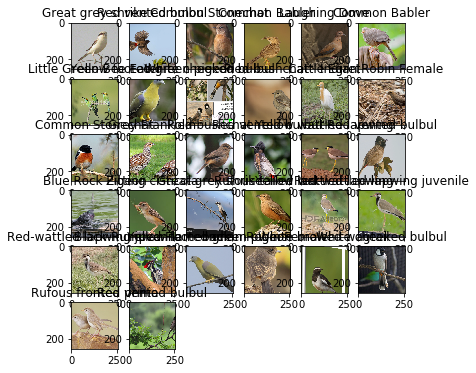

In [18]:
data.show_batch(6, figsize=(6,6), hide_axis=False)

In [19]:

learn = cnn_learner(data, models.resnet50, metrics=[error_rate,accuracy])

In [20]:
print(data.sanity_check())

None


In [21]:
learn.fit_one_cycle(8, max_lr=slice(1e-3))
learn.save("stage1-frozen-50.pth")

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,3.487183,1.309205,0.348089,0.651911,00:46
1,1.700394,0.734258,0.213280,0.786720,00:48
2,1.003182,0.654929,0.187123,0.812877,00:51
3,0.666259,0.629251,0.158954,0.841046,00:50
4,0.480761,0.560350,0.144869,0.855131,00:52
5,0.357765,0.536891,0.142857,0.857143,00:47
6,0.285890,0.524453,0.142857,0.857143,00:47
7,0.240120,0.532399,0.138833,0.861167,00:48


In [ ]:
1/0

In [22]:
learn.load("stage1-frozen-50.pth")
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))
learn.save("stage2-unfrozen-50.pth")

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.216649,0.509722,0.146881,0.853119,00:50
1,0.196734,0.495631,0.130785,0.869215,00:51
2,0.190590,0.488359,0.128773,0.871227,00:50


In [23]:

interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused(min_val=2)

[('Yellow wattled lapwing', 'Red-wattled lapwing juvenile', 4),
 ('Plain prinia', 'Rufous fronted prinia', 3),
 ('Brown RockChat', 'Indian Robin Female', 2),
 ('Eurasian Collared Dove', 'Laughing Dove', 2),
 ('Great grey shrike', 'Bay Backed Shrike', 2),
 ('Great grey shrike', 'Desert Wheatear', 2),
 ('Indian Bushlark', 'Zitting cisticola', 2),
 ('Indian Robin Female', 'Brown RockChat', 2),
 ('Laughing Dove', 'Red-collared dove', 2),
 ('Long tailed shrike juvenile', 'Bay Backed Shrike', 2),
 ('Rufous fronted prinia', 'Plain prinia', 2)]

epoch,train_loss,valid_loss,error_rate,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


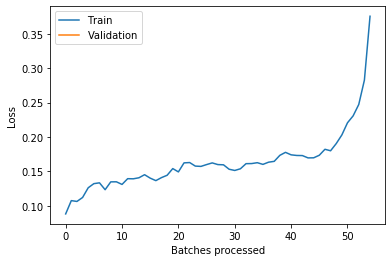

In [24]:
learn.lr_find()
learn.recorder.plot_losses()

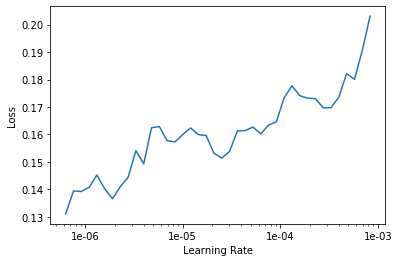

In [25]:
learn.recorder.plot()

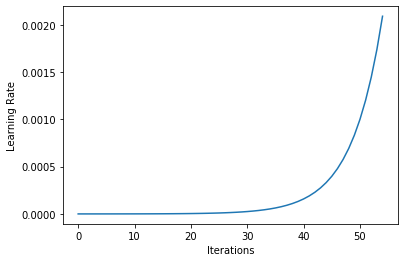

In [26]:
learn.recorder.plot_lr()

In [27]:
learn.export("birdsofpilani.pkl")